## BANKING RISK PREDICTION USING MACHINE LEARNING:

# Problem Statement->
    The objective of this project is to predict whether a banking customer poses 
    a high financial risk based on historical data.

In a banking context, misclassifying a high-risk customer as low-risk can lead to 
finacial lossses. Therefore, recall for the high-risk class is a critical evaluation metric.

In [43]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [3]:
# Read the dataset ->

df = pd.read_csv("Complex_Banking_Risk_Datset.csv")
df.head()

,Age,AnnualIncome,CreditScore,AccountTenure,MonthlyTxnCount,AvgTxnValue,MissedPayments,SupportCalls,OnlineUsageHours,HighRisk
0,59,1416383,667,16,82,36606,0,6,20,0
1,49,763506,346,7,179,57829,6,0,172,0
2,35,1129717,506,1,56,30617,10,8,148,1
3,63,715729,749,2,179,58088,4,3,170,0
4,28,1478342,782,9,203,40002,14,6,75,1


In [12]:
# Checking for duplicate rows:

duplicate = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate}")

Number of duplicated rows: 0


In [6]:
# Overview of data->

print(f"Number of rows:    {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n\nDatatype info: \n")
print(df.info())

print("\n\nBASIC STATISTICS: \n")
df.describe()

Number of rows:    12000
Number of columns: 10


Datatype info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               12000 non-null  int64
 1   AnnualIncome      12000 non-null  int64
 2   CreditScore       12000 non-null  int64
 3   AccountTenure     12000 non-null  int64
 4   MonthlyTxnCount   12000 non-null  int64
 5   AvgTxnValue       12000 non-null  int64
 6   MissedPayments    12000 non-null  int64
 7   SupportCalls      12000 non-null  int64
 8   OnlineUsageHours  12000 non-null  int64
 9   HighRisk          12000 non-null  int64
dtypes: int64(10)
memory usage: 937.6 KB
None


BASIC STATISTICS: 



,Age,AnnualIncome,CreditScore,AccountTenure,MonthlyTxnCount,AvgTxnValue,MissedPayments,SupportCalls,OnlineUsageHours,HighRisk
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,45.04,1595743.42,602.42,12.51,152.40,30225.19,7.04,5.57,129.25,0.35
std,14.08,808884.59,174.03,6.91,85.30,17232.62,4.31,3.46,69.13,0.48
min,21.00,200184.00,300.00,1.00,5.00,501.00,0.00,0.00,10.00,0.00
25%,33.00,897140.50,451.00,7.00,79.00,15351.50,3.00,3.00,70.00,0.00
50%,45.00,1590516.00,605.00,12.00,152.00,30338.00,7.00,6.00,129.00,0.00
75%,57.00,2296364.25,754.25,19.00,228.00,45248.00,11.00,9.00,189.00,1.00
max,69.00,2999888.00,899.00,24.00,299.00,59995.00,14.00,11.00,249.00,1.00


In [7]:
df["HighRisk"].value_counts(normalize=True)

HighRisk
0   0.65
1   0.35
Name: proportion, dtype: float64

## Data Observation->

-> Dataset contain structured numerical features and there is no missing data points.
-> Target variable("HighRisk") is binary (0-No, 1-Yes).
-> Target variable distribution shows class imbalance exists (35:65 ratio).

In [13]:
# Define the variables X,y. (Feature and target separation)->

X = df.drop("HighRisk", axis=1)
y = df["HighRisk"]

# Feature Selection->
-> The target variable "HighRisk" was separated from the features set.
   All remaining numerical feature is going to be used for modeling.

In [14]:
# Train-Test-Split->
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42, stratify=y)

# Dividing the data into two sets(Train_set, Test_set) for evaluating the model's metrics->
Data was split into training and testing set using stratification to preserve the target class distribution.

In [17]:
# Feature Scaling->
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Scaling->
Standardization of features were applied for Logistic Regression and Neural Networks because these models are sensitive to feature scale. Standadization simply overcome the feature biasness of models.

In [18]:
# TRAINING THE BASELINE MODEL-> lOGISTIC REGRESSION:

lr_model = LogisticRegression(class_weight="balanced", max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

# Logistic Regression as baseline model->
Logistic Regression model is used as baseline due to its interpretability and it is one of the basic model in Machine Learning.

In [22]:
# Logistic Regression Model Evaluation ->

y_pred_log = lr_model.predict(X_test)

lr_accuracy =  accuracy_score(y_test,y_pred_log)
lr_precision = precision_score(y_test,y_pred_log)
lr_recall = recall_score(y_test,y_pred_log)
lr_f1 = f1_score(y_test,y_pred_log)
lr_confusion_matrix = confusion_matrix(y_test,y_pred_log)

print("\nLOGISTIC REGRESSION MODEL METRICS:\n")
print(f"Accuracy:  {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall:    {lr_recall:.2f}")
print(f"F1 Score:  {lr_f1:.2f}")
print(f"Confusion matrix: \n{lr_confusion_matrix}")


LOGISTIC REGRESSION MODEL METRICS:

Accuracy:  0.95
Precision: 0.91
Recall:    0.95
F1 Score:  0.93
Confusion matrix: 
[[1486   74]
 [  45  795]]


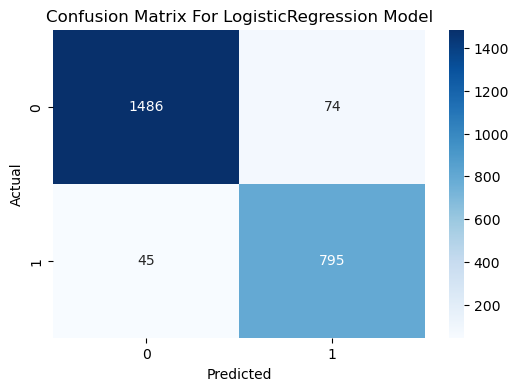

In [24]:
# Confusion Matrix Visualization->

plt.figure(figsize=(6,4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix For LogisticRegression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
# RANDOM FOREST MODEL->

rf_model = RandomForestClassifier(n_estimators =200, class_weight="balanced", random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

# Random Forest Model->
Random Forest model captures non-linear relationships and provide feature importance.

In [39]:
# Random Forest model evaluation->

y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test,y_pred_rf)
rf_precision = precision_score(y_test,y_pred_rf)
rf_recall = recall_score(y_test,y_pred_rf)
rf_f1 = recall_score(y_test,y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test,y_pred_rf)

print("\nRANDOM FOREST MODEL's METRICS:\n")
print(f"Accuracy:  {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall:    {rf_recall:.2f}")
print(f"F1 Score:  {rf_f1:.2f}")
print(f"Confusion Matrix: \n{rf_confusion_matrix}")


RANDOM FOREST MODEL's METRICS:

Accuracy:  0.97
Precision: 0.97
Recall:    0.95
F1 Score:  0.95
Confusion Matrix: 
[[1535   25]
 [  41  799]]


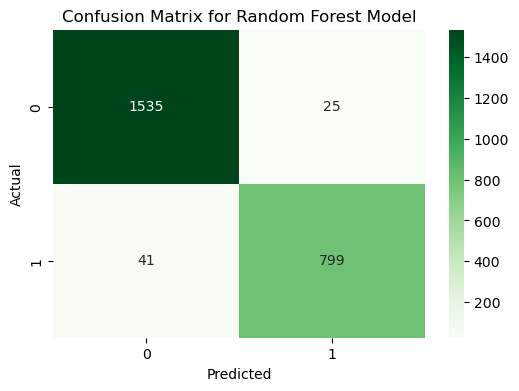

In [40]:
# Confusion Matrix Visualization:

plt.figure(figsize=(6,4))
sns.heatmap(rf_confusion_matrix, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
# Feature Importance:

feature_importance = pd.DataFrame({
    "Features": X.columns,
    "Importance": rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print("\nFeature Importance (for deciding the high risk customers):\n")
print(feature_importance.head(15))


Feature Importance (for deciding the high risk customers):

           Features  Importance
6    MissedPayments        0.79
7      SupportCalls        0.09
2       CreditScore        0.02
3     AccountTenure        0.02
1      AnnualIncome        0.02
5       AvgTxnValue        0.02
4   MonthlyTxnCount        0.02
8  OnlineUsageHours        0.02
0               Age        0.01


# Random Forest feature importance->
Random Forest feature importance reveals that behavioral data especially
"MissedPayments" history and "SupportCalls" drives 88% of the risk prediction
calculation overweighing "CreditScore".

In [41]:
# NEURAL NETWORK MODEL->

# Buliding nn model->
nn_model = Sequential()
nn_model.add(Dense(20, activation="relu", input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dense(10, activation="relu"))
nn_model.add(Dense(1, activation="sigmoid"))

D:\Users\Dushyant Kumar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Neural Network Model->
A neural network model is used to capture complex non-linear relationship which cannot be captured by traditinal ML model.

In [44]:
# Compile the model->

nn_model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy",metrics.Recall(name="recall")]
 )

In [47]:
# Train the nn model->
nn_model.fit(X_train_scaled,y_train, epochs = 40, batch_size = 50, validation_split = 0.20)

Epoch 1/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0549 - recall: 0.9664 - val_accuracy: 0.9714 - val_loss: 0.0691 - val_recall: 0.9526
Epoch 2/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0534 - recall: 0.9649 - val_accuracy: 0.9724 - val_loss: 0.0713 - val_recall: 0.9587
Epoch 3/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0535 - recall: 0.9664 - val_accuracy: 0.9719 - val_loss: 0.0710 - val_recall: 0.9572
Epoch 4/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9779 - loss: 0.0538 - recall: 0.9649 - val_accuracy: 0.9719 - val_loss: 0.0703 - val_recall: 0.9572
Epoch 5/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0535 - recall: 0.9664 - val_accuracy: 0.9714 - val_loss: 0.0697 - val_recall: 0.9557
Epoch 6/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9788 - loss: 0.0535 - recall: 0.9660 - val_accuracy: 0.9719 - val_loss: 0.0694 - val_recall: 0.9572
Epoc

In [52]:
# Model Evaluation->

loss,accuracy,recall = nn_model.evaluate(X_test,y_test)
test_accuracy = accuracy
test_recall = recall

print(f"Test_Accuracy: {accuracy:.2f}")
print(f"Test_Recall:   {recall:.2f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.0735 - recall: 0.9571 
Test_Accuracy: 0.97
Test_Recall:   0.96


In [53]:
# Finding the test Probabilities->

test_probabilities = nn_model.predict(X_test)
test_probabilities

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[2.1328210e-09],
       [8.2090039e-05],
       [3.2377813e-03],
       ...,
       [7.6722538e-01],
       [9.9672455e-01],
       [9.3052273e-05]], dtype=float32)

In [56]:
# Deciding the threshold->

best_recall = 0.96
best_accuracy = 0.97
best_precision = 0
best_f1 = 0
confusion_mat = 0
best_threshold = 0.5

thresholds = np.arange(0.10,1,0.05)

for t in thresholds:
    prediction = (test_probabilities > t).astype(int)
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    confusion = confusion_matrix(y_test,prediction)

    print(f"\nThreshold: {t:.2f} | Accuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f} | Confusion_matrix: \n{confusion}")


    if recall >= best_recall:
        best_threshold = t
        best_recall = recall
        best_accuracy = accuracy
        best_precision = precision
        best_f1 = f1
        confusion_mat = confusion


Threshold: 0.10 | Accuracy: 0.96 | Precision: 0.90 | Recall: 0.99 | F1 Score: 0.94 | Confusion_matrix: 
[[1465   95]
 [  12  828]]

Threshold: 0.15 | Accuracy: 0.96 | Precision: 0.91 | Recall: 0.98 | F1 Score: 0.95 | Confusion_matrix: 
[[1482   78]
 [  14  826]]

Threshold: 0.20 | Accuracy: 0.96 | Precision: 0.92 | Recall: 0.98 | F1 Score: 0.95 | Confusion_matrix: 
[[1489   71]
 [  17  823]]

Threshold: 0.25 | Accuracy: 0.97 | Precision: 0.93 | Recall: 0.98 | F1 Score: 0.95 | Confusion_matrix: 
[[1498   62]
 [  20  820]]

Threshold: 0.30 | Accuracy: 0.97 | Precision: 0.93 | Recall: 0.97 | F1 Score: 0.95 | Confusion_matrix: 
[[1503   57]
 [  24  816]]

Threshold: 0.35 | Accuracy: 0.96 | Precision: 0.94 | Recall: 0.97 | F1 Score: 0.95 | Confusion_matrix: 
[[1504   56]
 [  29  811]]

Threshold: 0.40 | Accuracy: 0.97 | Precision: 0.94 | Recall: 0.96 | F1 Score: 0.95 | Confusion_matrix: 
[[1511   49]
 [  30  810]]

Threshold: 0.45 | Accuracy: 0.97 | Precision: 0.95 | Recall: 0.96 | F1 Scor

In [59]:
print("\nNEURAL NETWORK MODEL'S METRICS FOR BEST RECALL:\n")
print(f"Best Recall: {best_recall:.2f}")
print(f"Threshold:   {best_threshold:.2f}")
print(f"Accuracy:    {best_accuracy:.2f}")
print(f"Precision:   {best_precision:.2f}")
print(f"F1 Score:    {best_f1:.2f}")
print(f"Confusion Matrix: \n{confusion_mat}")


NEURAL NETWORK MODEL'S METRICS FOR BEST RECALL:

Best Recall: 0.99
Threshold:   0.10
Accuracy:    0.96
Precision:   0.90
F1 Score:    0.94
Confusion Matrix: 
[[1465   95]
 [  12  828]]


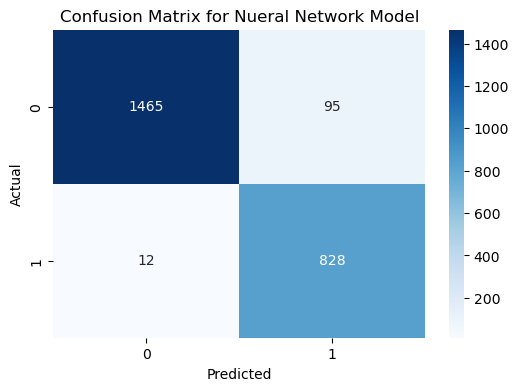

In [68]:
# Confusion matix visualization->

plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for Nueral Network Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
# Model Comparison Table->

fp_lr = lr_confusion_matrix[0,1]
fn_lr = lr_confusion_matrix[1,0]

fp_rf = rf_confusion_matrix[0,1]
fn_rf = rf_confusion_matrix[1,0]

fp_nn = confusion_mat[0,1]
fn_nn = confusion_mat[1,0]

comparison = pd.DataFrame({
    "Model":["Logistic_Regression","Random Forest", "Neural Network"],
    "Accuracy":[lr_accuracy,rf_accuracy,best_accuracy],
    "Precision":[lr_precision,rf_precision,best_precision],
    "Recall":[lr_recall,rf_recall,best_recall],
    "F1_Score":[lr_f1,rf_f1,best_f1],
    "FalseNegative(HighRisk cust missed)":[fn_lr,fn_rf,fn_nn],
    "FalsePositive(Wrong flag as HighRisk)":[fp_lr,fp_rf,fp_nn]
})

print("\nMODEL COMPARISON TABLE:")
comparison.head(10)


MODEL COMPARISON TABLE:


,Model,Accuracy,Precision,Recall,F1_Score,FalseNegative(HighRisk cust missed),FalsePositive(Wrong flag as HighRisk)
0,Logistic_Regression,0.95,0.91,0.95,0.93,45,74
1,Random Forest,0.97,0.97,0.95,0.95,41,25
2,Neural Network,0.96,0.90,0.99,0.94,12,95


# FINAL MODEL SELECTION->

->Based on the comparison table, I recommend "RANDOM FOREST" model for the deployment.

->Although the Neural Network achieved the highest recall(0.99) and missed very few high risk customers(12),
  it also resulted in a significantly higher number of safe customers being flagged as HighRisk(95),
  which could negatively impact the customer experience and may cause genuine customer churn.

->In case of any Lawsuit by customer for being flagged as HighRisk, 
  "Random Forest" can give you "Feature Importance" for arguing whereas in Neural Network
  it is very difficult to explain on which pattern the customer is flagged as HighRisk.

->Hence Random Forest Model offers the most practical and interpretable solution for real-world-banking risk assessment.